In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

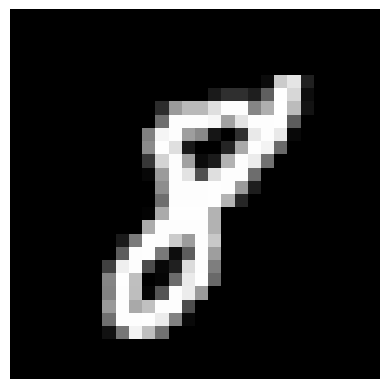

In [3]:

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Initialize an array to keep track of which labels have been saved
saved_labels = [False]*10

# Iterate over the training set
for image, label in zip(x_train, y_train):
    # If the current label has not been saved yet
    if not saved_labels[label]:
        # Save the image as a PNG file
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.savefig(f"label_{label}.png")
        # Mark the current label as saved
        saved_labels[label] = True
    # If all labels have been saved, break the loop
    if all(saved_labels):
        break

In [4]:
# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Initialize an array to keep track of which labels have been saved
saved_labels = [False]*10

# Iterate over the training set
for image, label in zip(x_train, y_train):
    # If the current label has not been saved yet
    if not saved_labels[label]:
        # Open a text file for the current label
        with open(f"label_{label}.txt", "w") as f:
            # Iterate over the rows of the image
            for row in image:
                # Convert each pixel to an 8-bit binary number and write it to the file
                f.write(''.join(f"{pixel:08b}" for pixel in row) + "\n")
        # Mark the current label as saved
        saved_labels[label] = True
    # If all labels have been saved, break the loop
    if all(saved_labels):
        break

In [15]:
import binascii
label_num = 9

with open(f"./label_{label_num}.txt", 'r') as f_in, open(f"./label_{label_num}_hex.txt", 'w') as f_out:
    for line in f_in:
        binary = line.strip()
        hex_value = binascii.hexlify(int(binary, 2).to_bytes((len(binary) + 7) // 8, 'big')).decode()
        f_out.write(hex_value + '\n')